In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette('magma')

In [12]:
df= pd.read_csv("dataset_ward_level_cleaned.csv")
df.head()

,Id,Population_2011_Census,Ward_Code,Ward_Name,District_Code,District,Crime_Rate,Open_Space,hh_Social_Rented,Job_Seekers,...,General_Fertility_Rate,Male_Life_Expectancy,Female_Life_Expectancy,Life_Expectancy,Children,Adult,Greater_Than_65,Non_White,Not_Born_In_UK,Not_English_Speaking
0,0,11201,00ANGQ,Town,00AN,Hammersmith and Fulham,117.7,0.0,23.7,3.6,...,47.3,78.8,81.1,80.0,16.7,76.1,7.2,22.7,40.5,11.9
1,1,11518,00ANGA,Addison,00AN,Hammersmith and Fulham,114.0,0.3,24.9,4.5,...,49.4,78.8,88.6,83.7,14.6,78.2,7.2,27.9,44.1,15.8
2,2,10800,00ADGN,Falconwood and Welling,00AD,Bexley,44.2,0.7,1.1,2.9,...,58.1,78.2,82.8,80.5,19.1,65.2,15.7,15.4,12.4,2.6
3,3,12321,00BEGH,East Dulwich,00BE,Southwark,65.3,0.7,20.3,4.6,...,76.7,81.2,82.9,82.0,17.5,73.8,8.7,28.2,25.9,5.6
4,4,12609,00BCFZ,Barkingside,00BC,Redbridge,64.3,1.3,4.7,4.2,...,68.7,81.0,85.7,83.4,20.3,64.9,14.8,64.2,40.5,12.8


In [13]:
df_info = pd.DataFrame(abs(df.corr()['Male_Life_Expectancy']).sort_values()).reset_index()
df_info.rename(columns={"index": "Feature", "Male_Life_Expectancy": "Coefficient Correlation"}, inplace=True)
df_info

,Feature,Coefficient Correlation
0,Open_Space,0.000258
1,Id,0.025054
2,Crime_Rate,0.025349
3,Not_Born_In_UK,0.038975
4,Not_English_Speaking,0.044722
5,Adult,0.050747
6,General_Fertility_Rate,0.168815
7,Non_White,0.196145
8,Cars_Per_Household,0.206412
9,Children,0.217825


Dropping all columns having corr coeff below 0.1

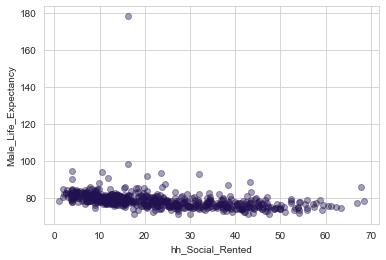

In [14]:
plt.scatter(df['hh_Social_Rented'], df['Male_Life_Expectancy'], alpha= 0.4)
plt.xlabel('hh_Social_Rented')
plt.ylabel('Male_Life_Expectancy')
plt.show()

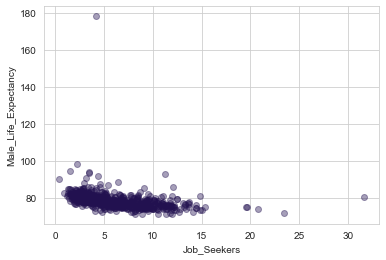

In [15]:
plt.scatter(df['Job_Seekers'], df['Male_Life_Expectancy'], alpha= 0.4)
plt.xlabel('Job_Seekers')
plt.ylabel('Male_Life_Expectancy')
plt.show()

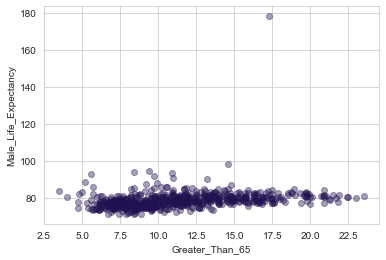

In [16]:
plt.scatter(df['Greater_Than_65'], df['Male_Life_Expectancy'], alpha= 0.4)
plt.xlabel('Greater_Than_65')
plt.ylabel('Male_Life_Expectancy')
plt.show()

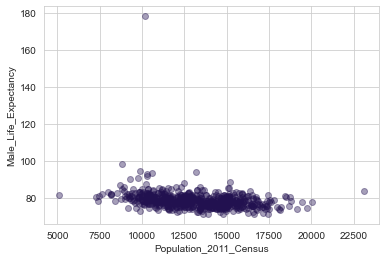

In [17]:
plt.scatter(df['Population_2011_Census'], df['Male_Life_Expectancy'], alpha= 0.4)
plt.xlabel('Population_2011_Census')
plt.ylabel('Male_Life_Expectancy')
plt.show()

In [18]:
#Drop all features with corr < 0.1
df= df.drop(['Id', 'Open_Space', 'Crime_Rate', 'Not_English_Speaking', 'Adult', 'Not_Born_In_UK', 'Female_Life_Expectancy', 'Life_Expectancy'], axis= 1)
df.head()

,Population_2011_Census,Ward_Code,Ward_Name,District_Code,District,hh_Social_Rented,Job_Seekers,No_Qual,Cars_Per_Household,General_Fertility_Rate,Male_Life_Expectancy,Children,Greater_Than_65,Non_White
0,11201,00ANGQ,Town,00AN,Hammersmith and Fulham,23.7,3.6,9.4,0.6,47.3,78.8,16.7,7.2,22.7
1,11518,00ANGA,Addison,00AN,Hammersmith and Fulham,24.9,4.5,9.3,0.5,49.4,78.8,14.6,7.2,27.9
2,10800,00ADGN,Falconwood and Welling,00AD,Bexley,1.1,2.9,22.1,1.3,58.1,78.2,19.1,15.7,15.4
3,12321,00BEGH,East Dulwich,00BE,Southwark,20.3,4.6,12.3,0.7,76.7,81.2,17.5,8.7,28.2
4,12609,00BCFZ,Barkingside,00BC,Redbridge,4.7,4.2,17.2,1.2,68.7,81.0,20.3,14.8,64.2


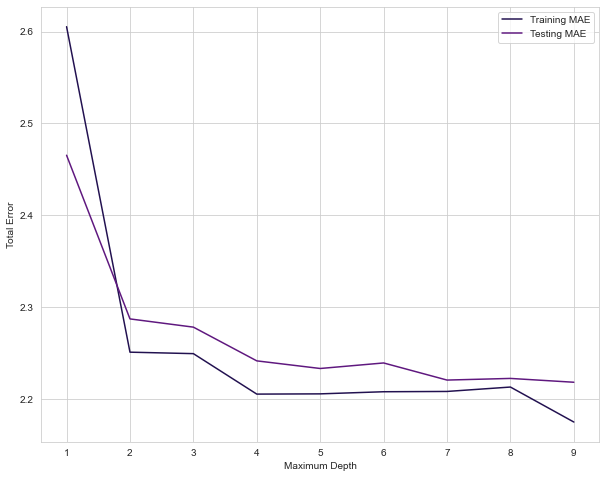

In [23]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(['District_Code', 'District', 'Male_Life_Expectancy', 'Ward_Code', 'Ward_Name'], axis=1)
y = df['Male_Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state = 42)

train_mae = [] # Log training errors for each model
test_mae = [] # Log testing errors for each model
for i in range(1,len(X_train.columns)+1):
    rfe = RFE(estimator=LinearRegression(),n_features_to_select=i, verbose=0)
    rfe.fit(X_train,y_train)
    train_mae.append(mean_absolute_error(y_train, rfe.predict(X_train)))
    test_mae.append(mean_absolute_error(y_test, rfe.predict(X_test)))

x_axs2 = np.arange(1,len(X_train.columns)+1) # Create domain for plot
plt.figure(figsize=(10,8)) 
plt.plot(x_axs2, train_mae, label='Training MAE') # Plot training error over domain
plt.plot(x_axs2, test_mae, label='Testing MAE') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

In [24]:
rfe = RFE(estimator=LinearRegression(),n_features_to_select=5, verbose=0)
rfe.fit(X_train,y_train)
fea = np.array(X_train.columns)
filter = rfe.get_support()
print("Selected features: {}".format(fea[filter]))

Selected features: ['hh_Social_Rented' 'Job_Seekers' 'No_Qual' 'Cars_Per_Household'
 'Greater_Than_65']


In [25]:
X_train = X_train[fea[filter]]
X_test = X_test[fea[filter]]

In [26]:
sklearn_model= LinearRegression().fit(X_train, y_train)
sklearn_y_predictions= sklearn_model.predict(X_test)

In [27]:
mean_absolute_error(sklearn_y_predictions, y_test)

2.2330173883840065

In [28]:
mean_squared_error(sklearn_y_predictions, y_test)

9.294462336141265

In [31]:
predictions_df= pd.DataFrame({'Ward_code': df['Ward_Code'],
                             'Ward_name': df['Ward_Name'],
                             'Male_Life_Expectancy': df['Male_Life_Expectancy'],
                             'Life_Expectancy_Prediction': sklearn_model.predict(X[fea[filter]])})
predictions_df

,Ward_code,Ward_name,Male_Life_Expectancy,Life_Expectancy_Prediction
0,00ANGQ,Town,78.8,79.223451
1,00ANGA,Addison,78.8,79.193595
2,00ADGN,Falconwood and Welling,78.2,80.246284
3,00BEGH,East Dulwich,81.2,79.203878
4,00BCFZ,Barkingside,81.0,80.772908
...,...,...,...,...
617,00BDFZ,"Ham, Petersham and Richmond Riverside",78.3,81.555270
618,00ARGW,Upminster,80.1,81.881560
619,00ASGN,Harefield,78.3,79.236726
620,00AFGQ,Darwin,81.2,82.066958
